In [1]:
from autocluster import AutoCluster
from algorithms import algorithms
from build_config_space import build_config_space
from utils.clusterutils import ClusterUtils
from sklearn.metrics import calinski_harabasz_score
from sklearn import datasets

%load_ext autoreload
%autoreload 2

In [2]:
varied, blobs, no_structure, noisy_circles, noisy_moons, aniso = ClusterUtils.generate_sample_data(1500)

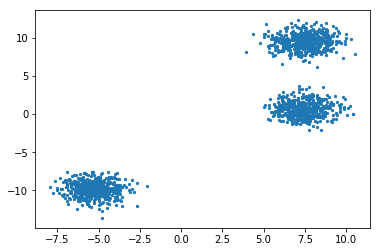

In [3]:
X = blobs[0]
# X = datasets.load_iris().data
ClusterUtils.visualize_sample_data(X)

### Test with Parallel Runs

In [ ]:
autocluster = AutoCluster()
smac_obj, opt_result = autocluster.fit(X, cluster_alg_ls=['AgglomerativeClustering'], 
                                       dim_reduction_alg_ls=['TSNE'],
                                       n_evaluations=20, seed=27, run_obj='quality', cutoff_time=10, 
                                       shared_model=True, n_parallel_runs = 3,
                                       evaluator=lambda X, y_pred: float('inf') if len(set(y_pred)) == 1 \
                                                else -1 * calinski_harabasz_score(X, y_pred)  
                                      )

Configuration space object:
  Hyperparameters:
    affinity___AgglomerativeClustering, Type: Categorical, Choices: {euclidean, cityblock, l2, l1, manhattan, cosine}, Default: euclidean
    clustering_choice, Type: Categorical, Choices: {AgglomerativeClustering}, Default: AgglomerativeClustering
    dim_reduction_choice, Type: Categorical, Choices: {TSNE}, Default: TSNE
    linkage___AgglomerativeClustering, Type: Categorical, Choices: {ward, complete, average, single}, Default: complete
    n_clusters___AgglomerativeClustering, Type: UniformInteger, Range: [1, 20], Default: 10
    n_components___TSNE, Type: UniformInteger, Range: [2, 3], Default: 2
    perplexity___TSNE, Type: UniformFloat, Range: [5.0, 50.0], Default: 30.0
  Conditions:
    affinity___AgglomerativeClustering | clustering_choice in {'AgglomerativeClustering'}
    linkage___AgglomerativeClustering | clustering_choice in {'AgglomerativeClustering'}
    n_clusters___AgglomerativeClustering | clustering_choice in {'Agglome

In [18]:
opt_result

Configuration:
  affinity___AgglomerativeClustering, Value: 'l1'
  clustering_choice, Value: 'AgglomerativeClustering'
  linkage___AgglomerativeClustering, Value: 'average'
  n_clusters___AgglomerativeClustering, Value: 3

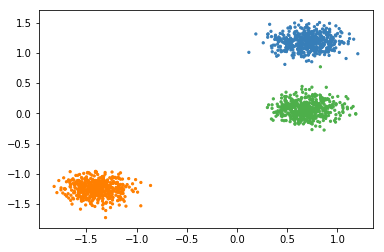

array([0, 0, 0, ..., 0, 1, 1])

In [19]:
autocluster.predict(X)

In [20]:
smac_obj.get_trajectory()

[TrajEntry(train_perf=2147483648, incumbent_id=1, incumbent=Configuration:
   affinity___AgglomerativeClustering, Value: 'euclidean'
   clustering_choice, Value: 'AgglomerativeClustering'
   linkage___AgglomerativeClustering, Value: 'complete'
   n_clusters___AgglomerativeClustering, Value: 10
 , ta_runs=0, ta_time_used=0, wallclock_time=0.00019311904907226562),
 TrajEntry(train_perf=-16158.661537892309, incumbent_id=1, incumbent=Configuration:
   affinity___AgglomerativeClustering, Value: 'euclidean'
   clustering_choice, Value: 'AgglomerativeClustering'
   linkage___AgglomerativeClustering, Value: 'complete'
   n_clusters___AgglomerativeClustering, Value: 10
 , ta_runs=1, ta_time_used=0.18099546432495117, wallclock_time=0.1989133358001709),
 TrajEntry(train_perf=-20998.714734106503, incumbent_id=2, incumbent=Configuration:
   affinity___AgglomerativeClustering, Value: 'euclidean'
   clustering_choice, Value: 'AgglomerativeClustering'
   linkage___AgglomerativeClustering, Value: 'ward

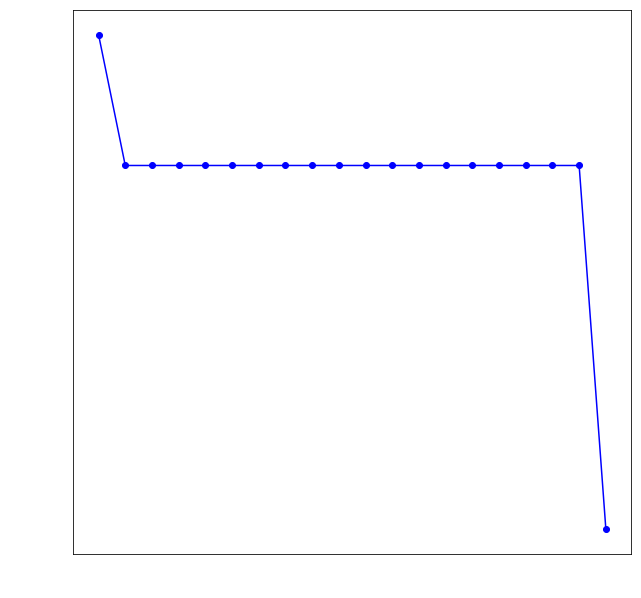

In [21]:
autocluster.plot_convergence()